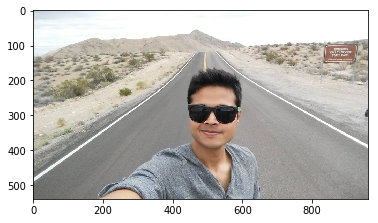

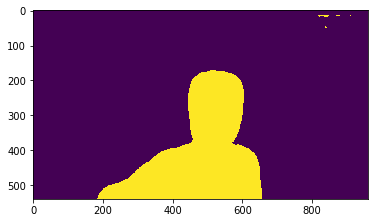

In [2]:
%matplotlib inline

import sys, os
sys.path.append("/home/daniil/repos/pytorch-segmentation-detection/")
sys.path.insert(0, '/home/daniil/repos/pytorch-segmentation-detection/vision/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated
import numpy as np

from pytorch_segmentation_detection.transforms import Copy, ComposeJoint
from pytorch_segmentation_detection.models.psp import Resnet50_8s_psp

fcn = Resnet50_8s_psp(num_classes=21)

# Model was trained over 2GPUs -- we need to first load weight to ram
fcn.load_state_dict(torch.load('resnet_50_psp_long.pth',
                               map_location=lambda storage, loc: storage))
fcn.cuda()
fcn.eval()

img_path = '/home/daniil/repos/pytorch-segmentation-detection/pytorch_segmentation_detection/recipes/pascal_voc/segmentation/demo_img_vittal.jpg'

valid_transform = ComposeJoint(
                [
                     #transforms.CenterCrop((1024, 1280)),
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)
img = Variable(img.cuda())

fcn.cuda()
fcn.eval()


res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()